<a href="https://colab.research.google.com/github/maxmussavian/euler-spiral/blob/main/acceleration_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
X = 1000. # length of segment
v = 60 / 3.6 # 60 km /h into m /s 
T_segment = X / v # time for each segments
time_step = 1 # how often to sample the steps

In [ ]:
r = X / np.pi # radius of curve
print(r)

318.3098861837907


In [ ]:
t_steps = np.arange(0, T_segment + time_step / 2, time_step) # times sampling
print(t_steps)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60.]


Part 1: First Straight

In [ ]:
x_first_straight = [t * v for t in t_steps]
y_first_straight = [0 * t for t in t_steps]
acceleration_first_straight   = [0 * t for t in t_steps]

Part 2: First Circular Bend

In [ ]:
x_first_bend = [X + r * np.sin(t * np.pi / T_segment) for t in t_steps]
y_first_bend = [r * (1. - np.cos(t * np.pi / T_segment)) for t in t_steps]
acceleration_first_bend = [1/r * v ** 2 for t in t_steps]

Part 3: Second Straight

In [ ]:
x_second_straight = [X - t * v for t in t_steps]
y_second_straight = [2 * r + 0 * t for t in t_steps]
acceleration_second_straight   = [0 * t for t in t_steps]

Part 4: Second Curve

In [ ]:
x_second_bend = [-r * np.sin(t * np.pi / T_segment) for t in t_steps]
y_second_bend = [r * (1 + np.cos(t * np.pi / T_segment)) for t in t_steps]
acceleration_second_bend = [1/r * v ** 2 for t in t_steps]


In [ ]:
x_pos_all = np.concatenate(
    [x_first_straight, x_first_bend, x_second_straight, x_second_bend]
    )
y_pos_all = np.concatenate(
    [y_first_straight, y_first_bend, y_second_straight, y_second_bend]
    )
acceleration_all = np.concatenate(
    [acceleration_first_straight, acceleration_first_bend,
     acceleration_second_straight, acceleration_second_bend
     ])

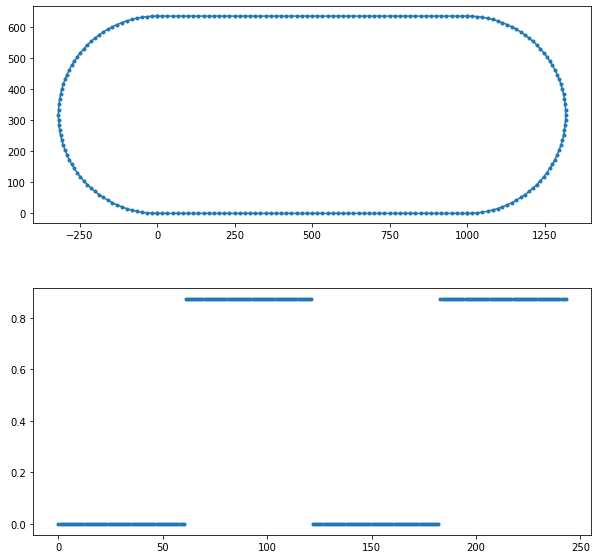

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(x_pos_all, y_pos_all, '.-')
ax[0].set_aspect('equal')
ax[1].plot(acceleration_all, '.')

In [ ]:
import scipy.special as sc
S_1, C_1 = sc.fresnel(1)

Here we calculate the curvature for the track so that width matches the original width.

In [ ]:
alpha = np.pi * S_1 ** 2 / r **2 

In [ ]:
print(alpha)

5.9554090571766435e-06


In [ ]:
width_curve = np.sqrt(np.pi / alpha) * C_1
height_curve = np.sqrt(np.pi / alpha) * S_1

Part 1: First straight section

In [ ]:
X_short = X + 2 * r - 2 * width_curve 
T_straight_segment = X_short / v
t_steps = np.arange(0, T_straight_segment + time_step / 2, time_step) # times sampling
print(T_straight_segment)
print(t_steps)

30.224312943935505
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


In [ ]:
x_first_straight = [t * v for t in t_steps]
y_first_straight = [0 * t for t in t_steps]
acceleration_first_straight   = [0 * t for t in t_steps]

Part 2: First Curved Section

In [ ]:
half_arc_length = np.sqrt(np.pi / alpha)
print(f'arc length -> {2 * half_arc_length}')
print(f'radius of circle at apex -> {1/(alpha * half_arc_length)}')

arc length -> 1452.610347458528
radius of circle at apex -> 231.19011718446035


In [ ]:
T_half_arc_length = half_arc_length / v
print(f'time spent on curve -> {2 * T_half_arc_length}')
t_steps = np.arange(0, T_half_arc_length + time_step / 2, time_step)
print(t_steps)

time spent on curve -> 87.15662084751168
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44.]


In [ ]:
s_c_grid = np.asarray([sc.fresnel(t / T_half_arc_length) for t in t_steps])

x_first_half_bend = np.array([np.sqrt(np.pi / alpha) * c + X_short for _, c in s_c_grid])
x_first_bend = np.concatenate([x_first_half_bend, np.flip(x_first_half_bend)])


In [ ]:
y_first_half_bend = np.array([np.sqrt(np.pi / alpha) * s for s, _ in s_c_grid])
y_first_bend = np.concatenate([y_first_half_bend, 2 * r - np.flip(y_first_half_bend)])


In [ ]:
acceleration_first_half_bend = np.array([alpha * v * t * v ** 2 for t in t_steps])
acceleration_first_bend = np.concatenate([acceleration_first_half_bend, np.flip(acceleration_first_half_bend)])
print(acceleration_first_bend)

[0.         0.02757134 0.05514268 0.08271401 0.11028535 0.13785669
 0.16542803 0.19299937 0.22057071 0.24814204 0.27571338 0.30328472
 0.33085606 0.3584274  0.38599874 0.41357007 0.44114141 0.46871275
 0.49628409 0.52385543 0.55142676 0.5789981  0.60656944 0.63414078
 0.66171212 0.68928346 0.71685479 0.74442613 0.77199747 0.79956881
 0.82714015 0.85471149 0.88228282 0.90985416 0.9374255  0.96499684
 0.99256818 1.02013951 1.04771085 1.07528219 1.10285353 1.13042487
 1.15799621 1.18556754 1.21313888 1.21313888 1.18556754 1.15799621
 1.13042487 1.10285353 1.07528219 1.04771085 1.02013951 0.99256818
 0.96499684 0.9374255  0.90985416 0.88228282 0.85471149 0.82714015
 0.79956881 0.77199747 0.74442613 0.71685479 0.68928346 0.66171212
 0.63414078 0.60656944 0.5789981  0.55142676 0.52385543 0.49628409
 0.46871275 0.44114141 0.41357007 0.38599874 0.3584274  0.33085606
 0.30328472 0.27571338 0.24814204 0.22057071 0.19299937 0.16542803
 0.13785669 0.11028535 0.08271401 0.05514268 0.02757134 0.    

In [ ]:
x_pos_all = np.concatenate(
    [x_first_straight, x_first_bend]
    )
y_pos_all = np.concatenate(
    [y_first_straight, y_first_bend]
    )
acceleration_all = np.concatenate(
    [acceleration_first_straight, acceleration_first_bend,
     acceleration_second_straight, acceleration_second_bend
     ])

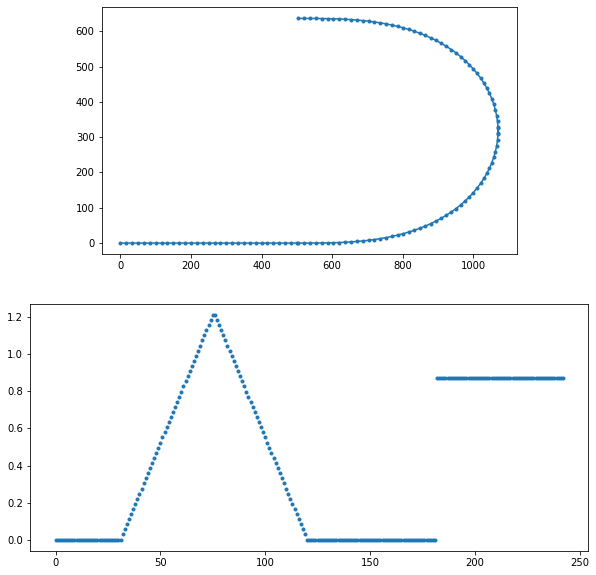

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(x_pos_all, y_pos_all, '.-')
ax[0].set_aspect('equal')
ax[1].plot(acceleration_all, '.')

In [ ]:
total_arc_length = np.sqrt(np.pi / alpha)
print(total_arc_length)
print(1/(alpha * total_arc_length))

726.305173729264
231.19011718446035


In [ ]:
total_arc_length * 4 - 2 * np.pi * r

905.2206949170559

In [ ]:
2 * 504 + 4 * total_arc_length

3913.220694917056

In [ ]:
r

318.3098861837907

In [ ]:
504/ (16/3.6)

113.39999999999999